#### DSC640-T301 
#### Project Milestone-3 
##### Chitramoy Mukherjee
##### Date: 10/04/2024

#### Import the Netflix data and validate the loaded data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-640\\Week-2\\nationaldatabaseofchildcareprices.xlsx')

# Preview the dataframe
df.head(5)


,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0


## Demographic and Geographic Information:
    #1. State_Name: The name of the state where the childcare data was collected.
    #2. State_Abbreviation: Abbreviation for the state.
    #3. County_Name: The name of the county within the state.
    #4. County_FIPS_Code: The Federal Information Processing Standards (FIPS) code for the county.
    #5. StudyYear: The year when the data was collected.
    #6. TotalPop: Total population in the area.
    #7. OneRace, OneRace_W, OneRace_B, OneRace_I, OneRace_A, OneRace_H, OneRace_Other: Population breakdown by race.
    #8. Hispanic: Population of Hispanic ethnicity.
## Employment and Labor Force Participation: 
    #1. EMP_M, MEMP_M, FEMP_M, EMP_Service, MEMP_Service, FEMP_Service, EMP_Sales, MEMP_Sales, FEMP_Sales, EMP_N, MEMP_N, FEMP_N, EMP_P, MEMP_P, FEMP_P: Employment-         related variables.
    #2. FLFPR_20to64, FLFPR_20to64_Under6, FLFPR_20to64_6to17, FLFPR_20to64_Under6_6to17: Labor force participation rates for adults aged 20 to 64, categorized by           childcare responsibilities.
## Income and Household Information: 
    #1. MHI, ME, FME, MME: Median household income for different groups.
    #2. Households: Total number of households.
    #3. H_Under6_BothWork, H_Under6_FWork, H_Under6_MWork, H_Under6_SingleM: Households with children under 6 and their employment status.
## Childcare Costs: 
    #1. MCBto5, MC6to11, MC12to17, MC18to23, MC24to29, MC30to35, MC36to41, MC42to47, MC48to53, MC54toSA, MCSA: Childcare costs for different age groups.
    #2. MFCCBto5, MFCC6to11, MFCC12to17, MFCC18to23, MFCC24to29, MFCC30to35, MFCC36to41, MFCC42to47, MFCC48to53, MFCC54toSA, MFCCSA: Childcare costs adjusted for            family income.
## Flags for Childcare Costs:
    #1. Flags indicating whether childcare costs are available for infants, toddlers, and preschoolers.

In [24]:
# Describe the dataset
description = df.describe(include='all')
print(description)


       State_Name State_Abbreviation        County_Name  County_FIPS_Code  \
count       34567              34567              34567      34567.000000   
unique         51                 51               1879               NaN   
top         Texas                 TX  Washington County               NaN   
freq         2794               2794                330               NaN   
mean          NaN                NaN                NaN      30388.132786   
std           NaN                NaN                NaN      15161.015383   
min           NaN                NaN                NaN       1001.000000   
25%           NaN                NaN                NaN      18177.000000   
50%           NaN                NaN                NaN      29177.000000   
75%           NaN                NaN                NaN      45081.000000   
max           NaN                NaN                NaN      56045.000000   

           StudyYear        UNR_16      FUNR_16       MUNR_16    UNR_20to64

In [27]:
# Check for missing values
missing_data = df.isnull().sum()

# Filter columns with missing values
fields_with_missing_data = missing_data[missing_data > 0]
print("Fields with missing data and their row count:\n", fields_with_missing_data)

Fields with missing data and their row count:
 H_Under6_SingleM            2
H_6to17_SingleM             2
MCBto5                  10974
MC6to11                 10974
MC12to17                10974
                        ...  
_75FCCInfant_flag       11184
_75FCCToddler           11184
_75FCCToddler_flag      11184
_75FCCPreschool         11184
_75FCCPreschool_flag    11184
Length: 114, dtype: int64


In [28]:
# Row count for each field
row_count = df.count()
print("Row count for each field:\n", row_count)


Row count for each field:
 State_Name              34567
State_Abbreviation      34567
County_Name             34567
County_FIPS_Code        34567
StudyYear               34567
                        ...  
_75FCCInfant_flag       23383
_75FCCToddler           23383
_75FCCToddler_flag      23383
_75FCCPreschool         23383
_75FCCPreschool_flag    23383
Length: 227, dtype: int64


In [21]:
# Summary statistics for decimal fields
decimal_columns = df.select_dtypes(include=np.number).columns
decimal_summary = df[decimal_columns].describe()
 
# Print summary statistics for decimal fields
print("\nSummary statistics for decimal fields:")
print(decimal_summary)


Summary statistics for decimal fields:
       County_FIPS_Code     StudyYear        UNR_16      FUNR_16  \
count      34567.000000  34567.000000  34567.000000  34567.00000   
mean       30388.132786   2012.999711      7.465902      7.02902   
std        15161.015383      3.162232      3.538619      3.56342   
min         1001.000000   2008.000000      0.000000      0.00000   
25%        18177.000000   2010.000000      5.100000      4.64000   
50%        29177.000000   2013.000000      7.050000      6.59000   
75%        45081.000000   2016.000000      9.350000      8.88000   
max        56045.000000   2018.000000     36.110000     38.24000   

            MUNR_16    UNR_20to64   FUNR_20to64   MUNR_20to64  FLFPR_20to64  \
count  34567.000000  34567.000000  34567.000000  34567.000000  34567.000000   
mean       7.860291      6.900073      6.482007      7.275457     70.086125   
std        4.037657      3.446199      3.477956      3.990758      7.696499   
min        0.000000      0.0000

In [7]:
# Step 3: Data Cleaning
# Check for missing values
print(df.isnull().sum())

State_Name                  0
State_Abbreviation          0
County_Name                 0
County_FIPS_Code            0
StudyYear                   0
                        ...  
_75FCCInfant_flag       11184
_75FCCToddler           11184
_75FCCToddler_flag      11184
_75FCCPreschool         11184
_75FCCPreschool_flag    11184
Length: 227, dtype: int64


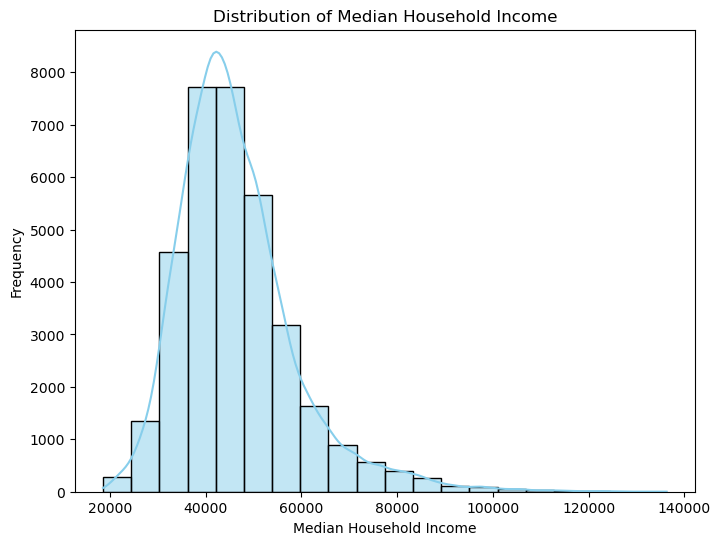

In [31]:
# Plotting
# 1. Histogram for Median Household Income (MHI)
plt.figure(figsize=(8, 6))
sns.histplot(df['MHI'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Median Household Income")
plt.xlabel("Median Household Income")
plt.ylabel("Frequency")
plt.show()

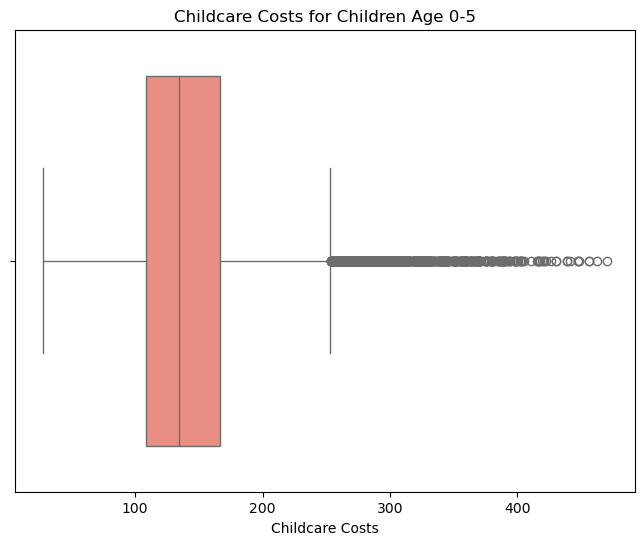

In [32]:
# 2. Boxplot for Childcare Costs (MCBto5)
plt.figure(figsize=(8, 6))
sns.boxplot(x='MCBto5', data=df, color='salmon')
plt.title("Childcare Costs for Children Age 0-5")
plt.xlabel("Childcare Costs")
plt.show()

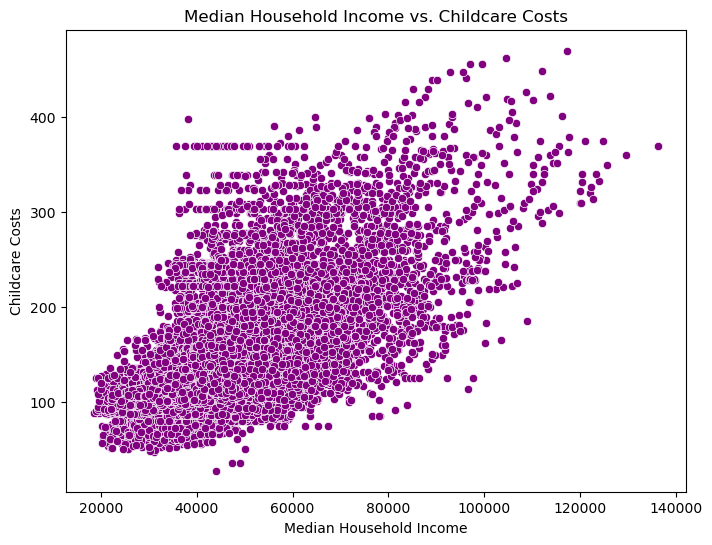

In [33]:
# 3. Scatterplot: Median Household Income vs. Childcare Costs
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MHI', y='MCBto5', data=df, color='purple')
plt.title("Median Household Income vs. Childcare Costs")
plt.xlabel("Median Household Income")
plt.ylabel("Childcare Costs")
plt.show()

In [34]:
# Ensure data types are correct
df['StudyYear'] = df['StudyYear'].astype(int)

In [10]:
# Step 4: Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

       County_FIPS_Code     StudyYear        UNR_16      FUNR_16  \
count      34567.000000  34567.000000  34567.000000  34567.00000   
mean       30388.132786   2012.999711      7.465902      7.02902   
std        15161.015383      3.162232      3.538619      3.56342   
min         1001.000000   2008.000000      0.000000      0.00000   
25%        18177.000000   2010.000000      5.100000      4.64000   
50%        29177.000000   2013.000000      7.050000      6.59000   
75%        45081.000000   2016.000000      9.350000      8.88000   
max        56045.000000   2018.000000     36.110000     38.24000   

            MUNR_16    UNR_20to64   FUNR_20to64   MUNR_20to64  FLFPR_20to64  \
count  34567.000000  34567.000000  34567.000000  34567.000000  34567.000000   
mean       7.860291      6.900073      6.482007      7.275457     70.086125   
std        4.037657      3.446199      3.477956      3.990758      7.696499   
min        0.000000      0.000000      0.000000      0.000000     33.60

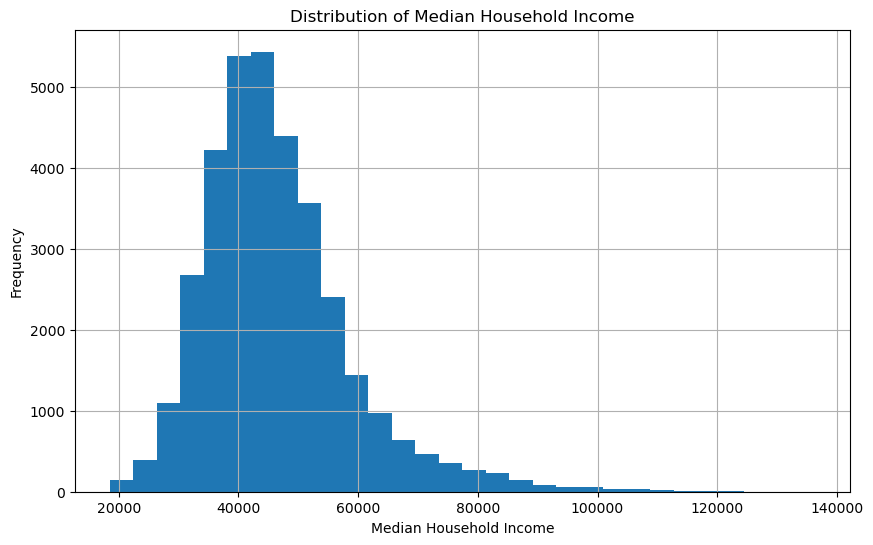

In [14]:
# Visualize key attributes
plt.figure(figsize=(10, 6))
df['MHI'].hist(bins=30)
plt.title('Distribution of Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Step 5: State-wise Childcare Prices
state_avg_prices = df.groupby('State_Name')[['MCBto5', 'MC6to11', 'MC12to17']].mean()
print(state_avg_prices)

                          MCBto5     MC6to11    MC12to17
State_Name                                              
Alabama               105.752958  105.752958  105.752958
Alaska                237.352857  237.352857  237.352857
Arizona               164.568545  164.568545  145.969879
Arkansas              104.916667  104.916667  104.916667
California            270.840031  270.840031  270.840031
Colorado              224.837500  224.604688  207.859375
Connecticut           253.238636  253.238636  253.238636
Delaware              175.593333  175.593333  156.917879
District of Columbia  303.580000  303.580000  282.070000
Florida               144.228260  144.228260  139.687852
Georgia               110.534591  110.534591  105.534591
Hawaii                286.011250  286.011250  286.011250
Idaho                 115.751851  115.751851  113.910942
Illinois              173.852522  173.852522  173.852522
Indiana                      NaN         NaN         NaN
Iowa                  154.75757

In [16]:
# Step 6: Minimum and Maximum Wages
min_wage = df[['State_Name', 'ME']].groupby('State_Name').min()
max_wage = df[['State_Name', 'ME']].groupby('State_Name').max()
print("Minimum Wages by State:\n", min_wage)
print("Maximum Wages by State:\n", max_wage)

Minimum Wages by State:
                             ME
State_Name                    
Alabama               15229.00
Alaska                11763.00
Arizona               19205.00
Arkansas              12487.00
California            15104.00
Colorado              13926.00
Connecticut           29864.00
Delaware              26741.00
District of Columbia  39586.00
Florida               16330.00
Georgia               15474.00
Hawaii                27217.00
Idaho                  8187.00
Illinois               9673.00
Indiana               15956.00
Iowa                  16202.00
Kansas                15011.00
Kentucky              14100.00
Louisiana             12967.00
Maine                 20179.00
Maryland              17026.00
Massachusetts         23359.00
Michigan              11847.00
Minnesota             16646.00
Mississippi           12268.00
Missouri              12947.00
Montana               15955.00
Nebraska               9636.00
Nevada                20729.00
New Hampshire 